In [1]:
import pandas
import sklearn.cluster

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
infilename = "drivethrurpg-hasbro.csv"
outfilename = infilename

In [5]:
df = pandas.read_csv(infilename)
df.head()

,title,url,page_count,published_date,system,modified_date,price,softcover,hardcover,premium,pdf,color,product,Greg Stafford,number of authors,number of artists
0,FlexTale Adventure Generator: Dungeons,https://www.drivethrurpg.com/en/product/481319...,536.0,5/17/24,"Any system / system-agnostic, 5e-compatible, P...","May 17, 2024",19.99,0,0,0,1,0,PDF,0,1,2
1,Baptism of Fire,https://www.drivethrurpg.com/en/product/470760...,380.0,4/27/24,"Dungeons & Dragons, Other OSR Games","Mar 31, 2024",11.99,0,0,0,1,0,PDF,0,1,3
2,Baptism of Fire,https://www.drivethrurpg.com/en/product/470760...,380.0,4/27/24,"Dungeons & Dragons, Other OSR Games","Mar 31, 2024",69.99,1,0,1,0,1,"Softcover, Premium Color Book (8.5"" x 11"")",0,1,3
3,Baptism of Fire,https://www.drivethrurpg.com/en/product/470760...,380.0,4/27/24,"Dungeons & Dragons, Other OSR Games","Mar 31, 2024",74.99,0,1,1,0,1,"Hardcover, Premium Color Book (8.5"" x 11"")",0,1,3
4,Baptism of Fire,https://www.drivethrurpg.com/en/product/470760...,380.0,4/27/24,"Dungeons & Dragons, Other OSR Games","Mar 31, 2024",39.99,1,0,0,0,1,"Softcover, Standard Color Book (8.5"" x 11"")",0,1,3


In [13]:
X = df[['price', 'page_count', "softcover", "hardcover", "premium", "pdf", "color", "number of authors", "number of artists"]].dropna(how='any')
X.head()

,price,page_count,softcover,hardcover,premium,pdf,color,number of authors,number of artists
0,19.99,536.0,0,0,0,1,0,1,2
1,11.99,380.0,0,0,0,1,0,1,3
2,69.99,380.0,1,0,1,0,1,1,3
3,74.99,380.0,0,1,1,0,1,1,3
4,39.99,380.0,1,0,0,0,1,1,3


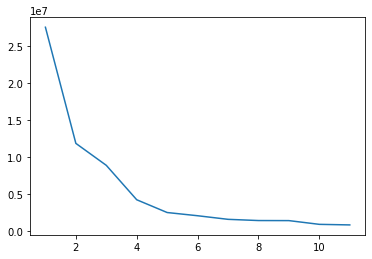

In [16]:
ks = [ k for k in range(1, 12) ]
inertias = []
for k in ks:
    model = sklearn.cluster.KMeans(n_clusters=k).fit(X)
    inertias.append(model.inertia_)
    
import matplotlib.pyplot
matplotlib.pyplot.plot(ks, inertias)

In [19]:
d = [ inertias[d+2] - 2 * inertias[d + 1] + inertias[d] for d in range(0,9) ]
d

[12762475.3320919,
 -1687538.2127228267,
 2934001.8067466505,
 1296160.2511529773,
 -52757.99231192563,
 323278.83819871955,
 154850.51551243477,
 -496868.7751451768,
 429472.3956440347]

In [20]:
model = sklearn.cluster.KMeans(n_clusters = 5).fit(X)
model

KMeans(n_clusters=5)